In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import requests
from weatherbit.api import Api
import warnings
warnings.simplefilter("ignore")

In [2]:
italia = pd.read_csv('2020_IT_Region_Mobility_Report.csv')

In [3]:
api_key = "e2b62675291d4c93aabcd1ed9ae3923b"
api = Api(api_key)

In [4]:
api.set_granularity('daily')

In [5]:
italia['date'] = pd.to_datetime(italia['date'])

In [6]:
italia['weekday'] = pd.to_datetime(italia['date']).dt.weekday

In [7]:
italia.drop(columns = ['country_region_code', 'country_region', 'metro_area', 'iso_3166_2_code', 'census_fips_code'], inplace = True )

In [8]:
italia[['retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']].corr()

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
retail_and_recreation_percent_change_from_baseline,1.000000,0.875174,0.789355,0.881041,0.717346,-0.882204
grocery_and_pharmacy_percent_change_from_baseline,0.875174,1.000000,0.623214,0.750241,0.644576,-0.710166
parks_percent_change_from_baseline,0.789355,0.623214,1.000000,0.774017,0.469219,-0.675462
transit_stations_percent_change_from_baseline,0.881041,0.750241,0.774017,1.000000,0.740720,-0.827617
workplaces_percent_change_from_baseline,0.717346,0.644576,0.469219,0.740720,1.000000,-0.857449
residential_percent_change_from_baseline,-0.882204,-0.710166,-0.675462,-0.827617,-0.857449,1.000000


In [9]:
# National level DataFrame

italia_n = italia[(italia['sub_region_1'] != italia['sub_region_1'])]
italia_n.drop(italia[['sub_region_1', 'sub_region_2']], axis = 1, inplace = True)
italia_n

,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,weekday
0,2020-02-15,3.0,-1.0,35.0,9.0,0.0,-1.0,5
1,2020-02-16,3.0,2.0,26.0,11.0,1.0,-2.0,6
2,2020-02-17,0.0,1.0,7.0,3.0,1.0,0.0,0
3,2020-02-18,3.0,1.0,16.0,4.0,1.0,0.0,1
4,2020-02-19,0.0,-1.0,11.0,3.0,1.0,0.0,2
...,...,...,...,...,...,...,...,...
292,2020-12-03,-35.0,-4.0,-32.0,-44.0,-27.0,14.0,3
293,2020-12-04,-38.0,-6.0,-38.0,-45.0,-28.0,15.0,4
294,2020-12-05,-44.0,-9.0,-44.0,-48.0,-26.0,14.0,5
295,2020-12-06,-56.0,-30.0,-58.0,-55.0,-24.0,14.0,6


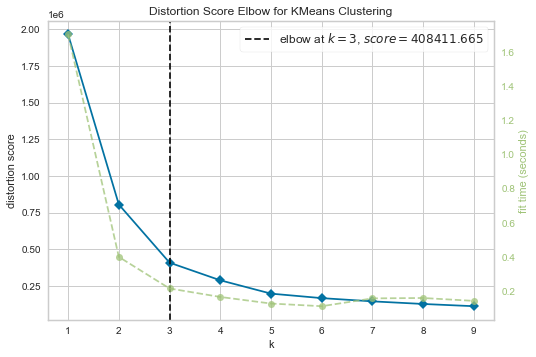

In [10]:
# National: clustering showing seasonality due to variable 'parks'.

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(italia[['retail_and_recreation_percent_change_from_baseline', 
                       'grocery_and_pharmacy_percent_change_from_baseline', 
                       'parks_percent_change_from_baseline', 
                       'transit_stations_percent_change_from_baseline', 
                       'workplaces_percent_change_from_baseline', 
                       'residential_percent_change_from_baseline']][(italia['sub_region_1'] != italia['sub_region_1'])])        
visualizer.show()

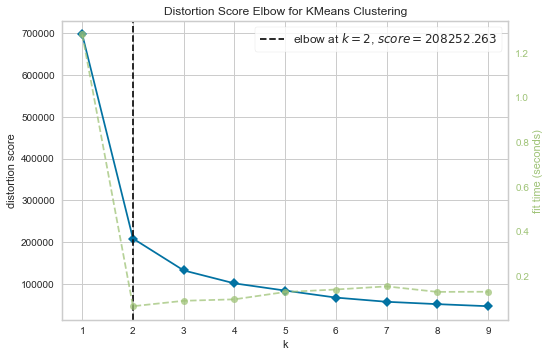

In [11]:
# National: clustering showing only the cut between 'lockdown' and 'non-lockdown' periods - variable 'parks' excluded.

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(italia[['retail_and_recreation_percent_change_from_baseline',
                       'grocery_and_pharmacy_percent_change_from_baseline',
                       'transit_stations_percent_change_from_baseline',
                       'workplaces_percent_change_from_baseline',
                       'residential_percent_change_from_baseline']][(italia['sub_region_1'] != italia['sub_region_1'])])        
visualizer.show()

In [12]:
# National, weekdays: clustering 'retail' vs 'parks' - variation including season and lockdown.

model = KMeans(n_clusters= 4)

X_n_w = italia[['date', 'retail_and_recreation_percent_change_from_baseline',
                'parks_percent_change_from_baseline']][(italia['sub_region_1'] != italia['sub_region_1'])&(italia['weekday'].isin (range(5)))]

model.fit(X_n_w[['retail_and_recreation_percent_change_from_baseline',
                'parks_percent_change_from_baseline']])
X_n_w['cluster'] = model.predict(X_n_w[['retail_and_recreation_percent_change_from_baseline',
                'parks_percent_change_from_baseline']])

In [13]:
# National, weekdays: looking for patterns of seasonality

X_n_w.groupby(by= 'cluster').mean()

,retail_and_recreation_percent_change_from_baseline,parks_percent_change_from_baseline
cluster,,
0,-6.561404,76.964912
1,-76.755556,-67.466667
2,-23.831579,-1.305263
3,0.285714,167.214286


In [14]:
# National, weekend: clustering 'retail' vs 'parks' - variation including season and lockdown.

model = KMeans(n_clusters= 4)

X_n_e = italia[['date', 'retail_and_recreation_percent_change_from_baseline',
                'parks_percent_change_from_baseline']][(italia['sub_region_1'] != italia['sub_region_1'])&(italia['weekday'].isin ([5,6]))]

model.fit(X_n_e[['retail_and_recreation_percent_change_from_baseline',
                'parks_percent_change_from_baseline']])
X_n_e['cluster'] = model.predict(X_n_e[['retail_and_recreation_percent_change_from_baseline',
                'parks_percent_change_from_baseline']])

In [15]:
# National, weekends: looking for patterns of seasonality

X_n_e.groupby(by= 'cluster').mean()

,retail_and_recreation_percent_change_from_baseline,parks_percent_change_from_baseline
cluster,,
0,-52.250000,-31.687500
1,-20.857143,17.178571
2,-89.500000,-83.937500
3,-14.730769,77.230769


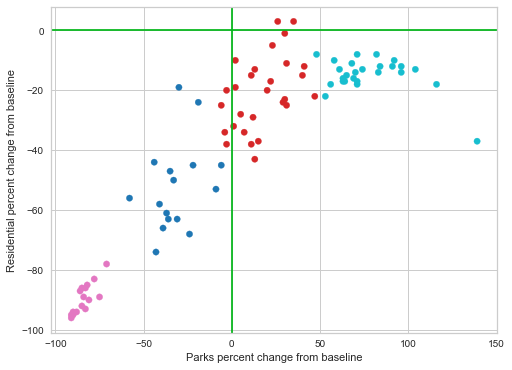

In [16]:
fig, ax = plt.subplots(figsize=(8,6))

plt.scatter(X_n_e['parks_percent_change_from_baseline'],X_n_e['retail_and_recreation_percent_change_from_baseline'], s = 40, c =X_n_e['cluster'], cmap='tab10' )

plt.axhline(0, -100, 200, color = '#04B71A')
plt.axvline(0, -100,5.000000, color = '#04B71A')

ax.set(xlabel = 'Parks percent change from baseline', ylabel ='Residential percent change from baseline')

plt.savefig('Cor_parks_vs_ retail_e.png');

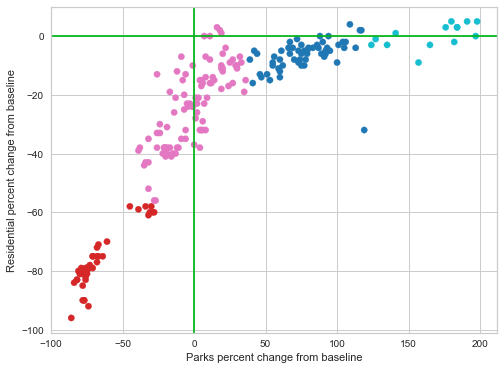

In [17]:
fig, ax = plt.subplots(figsize=(8,6))

plt.scatter(X_n_w['parks_percent_change_from_baseline'],X_n_w['retail_and_recreation_percent_change_from_baseline'], s = 40, c =X_n_w['cluster'], cmap='tab10' )

plt.axhline(0, -100, 200, color = '#04B71A')
plt.axvline(0, -100,5.000000, color = '#04B71A')

ax.set(xlabel = 'Parks percent change from baseline', ylabel ='Residential percent change from baseline')

plt.savefig('Cor_parks_vs_ retail_w.png');

In [18]:
model = KMeans(n_clusters= 4)

X_n = italia_n[['date', 'retail_and_recreation_percent_change_from_baseline',
                'parks_percent_change_from_baseline']]
model.fit(X_n[['retail_and_recreation_percent_change_from_baseline',
                'parks_percent_change_from_baseline']])
X_n['cluster'] = model.predict(X_n[['retail_and_recreation_percent_change_from_baseline',
                'parks_percent_change_from_baseline']])

In [19]:
italia_n['status_code'] = X_n['cluster']

In [20]:
italia_n[['retail_and_recreation_percent_change_from_baseline','status_code']].groupby(by = 'status_code').mean()

,retail_and_recreation_percent_change_from_baseline
status_code,
0,-75.103896
1,-9.047059
2,-2.200000
3,-22.816667


In [21]:
mean_list = []
code_dict = {}
equiv_dict = {}

for i in range(4):
    mean_list.append(italia_n['retail_and_recreation_percent_change_from_baseline'][italia_n['status_code'] == i].mean() +
                    italia_n['parks_percent_change_from_baseline'][italia_n['status_code'] == i].mean())
    code_dict.update({i:italia_n['retail_and_recreation_percent_change_from_baseline'][italia_n['status_code'] == i].mean() +
                    italia_n['parks_percent_change_from_baseline'][italia_n['status_code'] == i].mean()})


mean_list = sorted(mean_list)
zip_eq = zip(mean_list, [i for i in range(4)])
equiv_dict = dict(zip_eq)

for i in mean_list:
    for j in code_dict.items():
        if j[1] == i:
            italia_n.loc[italia_n['status_code'] == j[0], 'status_code_2'] = int(equiv_dict[i])
            
italia_n['status_code'] = italia_n['status_code_2'].astype('int64')
italia_n.drop(columns = 'status_code_2', inplace = True)

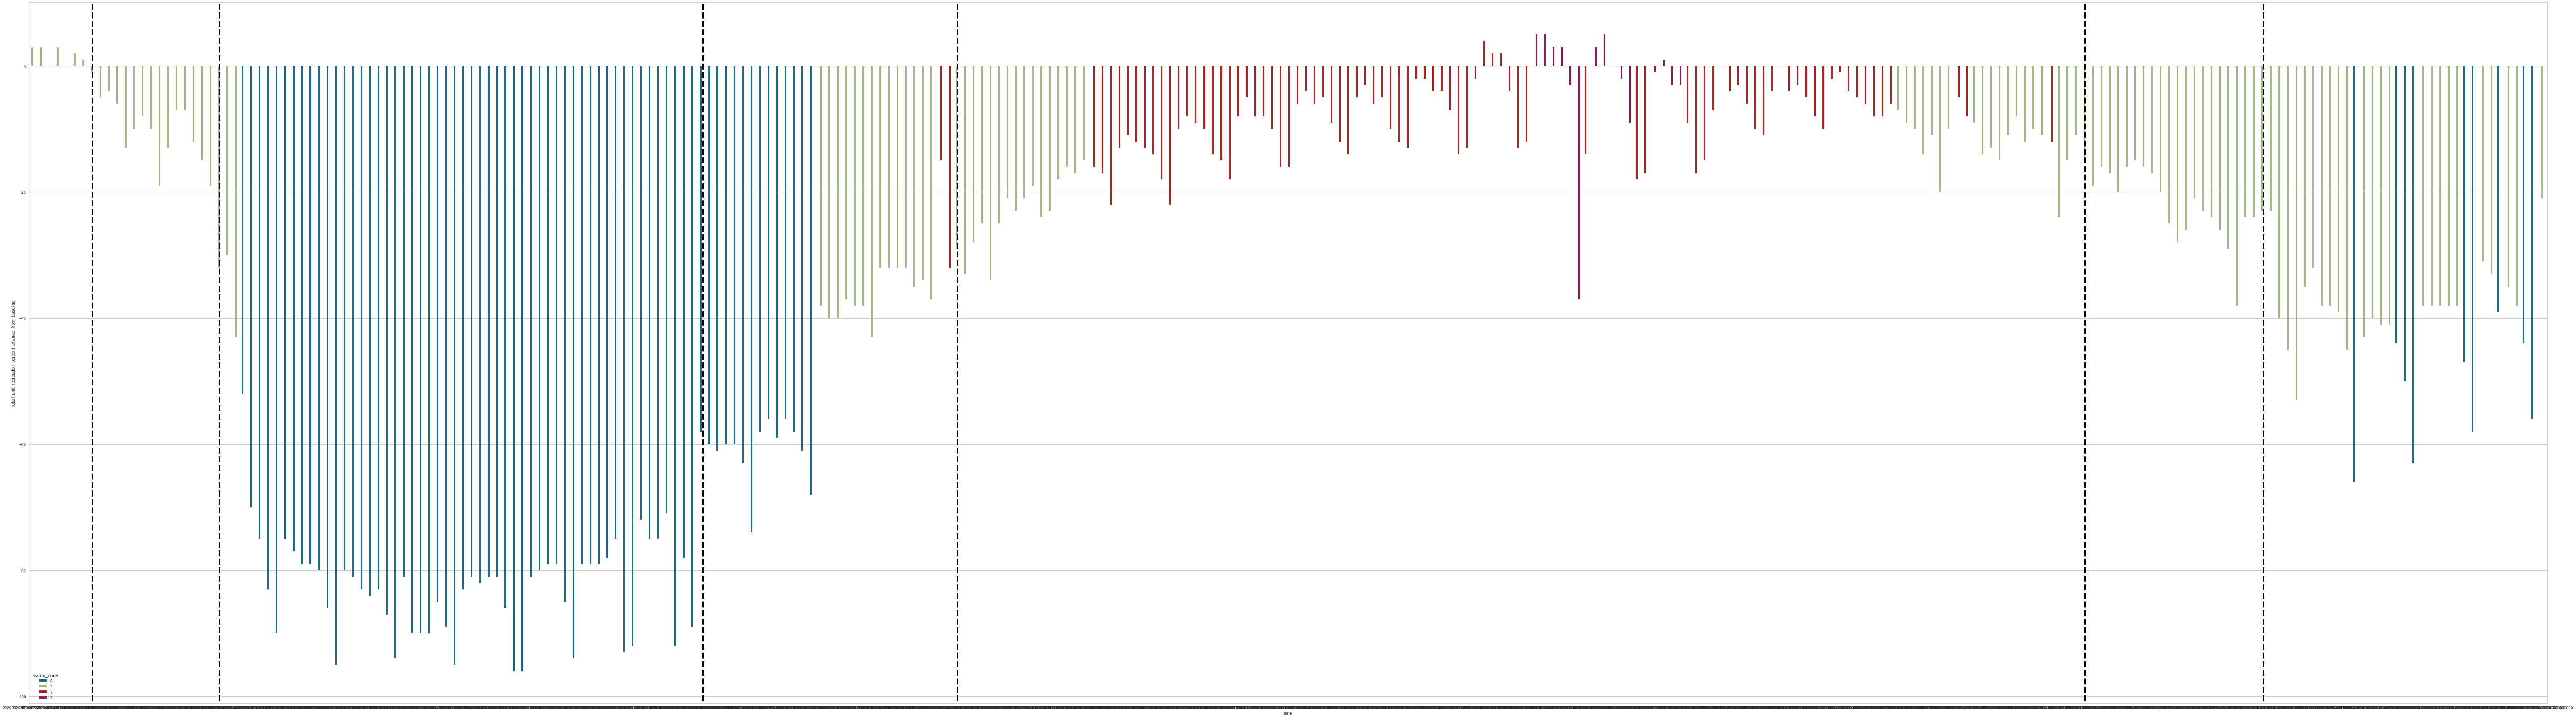

In [22]:
fig, ax = plt.subplots(figsize=(112,32))

sns.barplot(ax = ax, x = italia_n['date'], y = italia_n['retail_and_recreation_percent_change_from_baseline'], hue = italia_n['status_code'])

# 22th. Febraury, lockdown in northern Italy
plt.axvline(7, -96.000000,5.000000, color = 'black', linewidth=4, linestyle = '--' )
# 8th. March ampliation of lockdown
plt.axvline(22, -96.000000,5.000000, color = 'black', linewidth=4, linestyle = '--')
# 4th. May, restitution of freedom of movement
plt.axvline(79, -96.000000,5.000000, color = 'black', linewidth=4, linestyle = '--')
# 3rd. June, inter-regional freedom of movement
plt.axvline(109, -96.000000,5.000000, color = 'black', linewidth=4, linestyle = '--')
# 14th. October, peak of new cases
plt.axvline(242, -96.000000,5.000000, color = 'black', linewidth=4, linestyle = '--')
# 11th November, national lockdown
plt.axvline(263, -96.000000,5.000000, color = 'black', linewidth=4, linestyle = '--');



plt.savefig('timeline.png')


In [23]:
italia_n.iloc[[85,86],:]

,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,weekday,status_code
85,2020-05-10,-74.0,-61.0,-43.0,-57.0,-28.0,13.0,6,0
86,2020-05-11,-58.0,-31.0,-45.0,-61.0,-43.0,19.0,0,0


In [24]:
dates_list= []

for i in range(0,8):
    
    dates_list.append(italia_n.iloc[i, 0])
for i in range(109,263):
    
    dates_list.append(italia_n.iloc[i, 0])

In [25]:
italia_s = italia_n[italia_n['date'].isin(dates_list)]

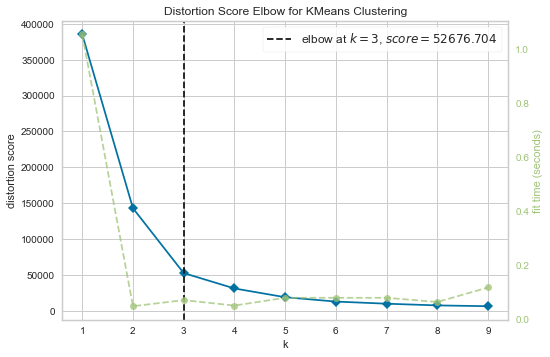

In [26]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(italia_s[['parks_percent_change_from_baseline']])
visualizer.show()

In [27]:
model = KMeans(n_clusters= 4)

X_s = italia_s[['parks_percent_change_from_baseline']]
model.fit(X_s[['parks_percent_change_from_baseline']])
X_s['cluster'] = model.predict(X_s[['parks_percent_change_from_baseline']])

In [28]:
italia_s['season_code'] = X_s['cluster']

In [29]:
italia_s[['season_code', 'parks_percent_change_from_baseline']].groupby(by= 'season_code').mean()

,parks_percent_change_from_baseline
season_code,
0,62.584906
1,12.343750
2,174.500000
3,99.424242


In [30]:
mean_list_s = []
code_dict_s = {}
equiv_dict_s = {}

for i in range(4):
    mean_list_s.append(italia_s['parks_percent_change_from_baseline'][italia_s['season_code'] == i].mean())
    code_dict_s.update({i:italia_s['parks_percent_change_from_baseline'][italia_s['season_code'] == i].mean()})


mean_list_s = sorted(mean_list_s)
zip_eq_s = zip(mean_list_s, [i for i in range(4)])
equiv_dict_s = dict(zip_eq_s)

for i in mean_list_s:
    for j in code_dict_s.items():
        if j[1] == i:
            italia_s.loc[italia_s['season_code'] == j[0], 'season_code_2'] = int(equiv_dict_s[i])
            
italia_s['season_code'] = italia_s['season_code_2'].astype('int64')
italia_s.drop(columns = 'season_code_2', inplace = True)

In [31]:
# Pre-lockdown: similar week

reference_list = [1,2,3,4,5,6,7]

italia_s[['date','parks_percent_change_from_baseline', 'retail_and_recreation_percent_change_from_baseline', 'residential_percent_change_from_baseline', 'weekday']][italia_s.index.isin(reference_list)]

,date,parks_percent_change_from_baseline,retail_and_recreation_percent_change_from_baseline,residential_percent_change_from_baseline,weekday
1,2020-02-16,26.0,3.0,-2.0,6
2,2020-02-17,7.0,0.0,0.0,0
3,2020-02-18,16.0,3.0,0.0,1
4,2020-02-19,11.0,0.0,0.0,2
5,2020-02-20,18.0,2.0,0.0,3
6,2020-02-21,19.0,1.0,-1.0,4
7,2020-02-22,30.0,-1.0,-1.0,5


In [32]:
# Post-lockdown: similar week

comparison_list = [229,230,231,232,233,234,235]

italia_s[['date','parks_percent_change_from_baseline', 'retail_and_recreation_percent_change_from_baseline', 'residential_percent_change_from_baseline', 'weekday']][italia_s.index.isin(comparison_list)]

,date,parks_percent_change_from_baseline,retail_and_recreation_percent_change_from_baseline,residential_percent_change_from_baseline,weekday
229,2020-10-01,25.0,-9.0,3.0,3
230,2020-10-02,8.0,-14.0,4.0,4
231,2020-10-03,13.0,-13.0,2.0,5
232,2020-10-04,11.0,-15.0,1.0,6
233,2020-10-05,19.0,-11.0,3.0,0
234,2020-10-06,27.0,-8.0,3.0,1
235,2020-10-07,20.0,-12.0,3.0,2


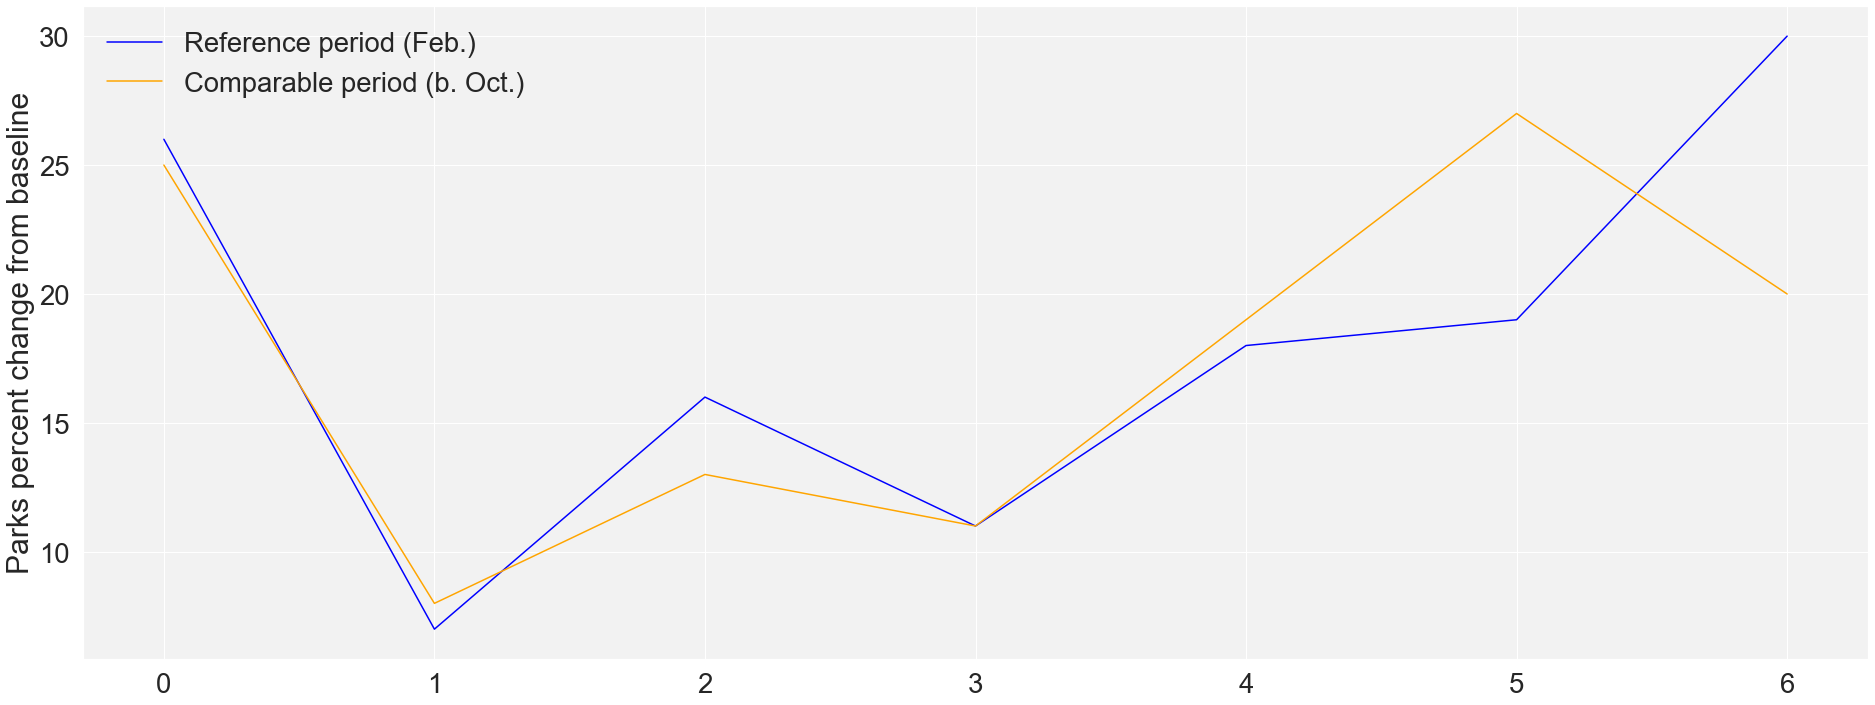

In [33]:
sns.set(font_scale = 2.5)
fig, ax = plt.subplots(figsize=(32,12))

sns.lineplot(ax = ax, x = [0,1,2,3,4,5,6], y = italia_s['parks_percent_change_from_baseline'][italia_s.index.isin(reference_list)], color = "blue")
sns.lineplot(ax = ax, x = [0,1,2,3,4,5,6], y = italia_s['parks_percent_change_from_baseline'][italia_s.index.isin(comparison_list)], color = "orange")

ax.set(ylabel ='Parks percent change from baseline')

plt.legend(labels = ['Reference period (Feb.)', 'Comparable period (b. Oct.)'])

ax.set_facecolor('#F2F2F2')

plt.savefig('Similar_pattern_week_pattern.png');

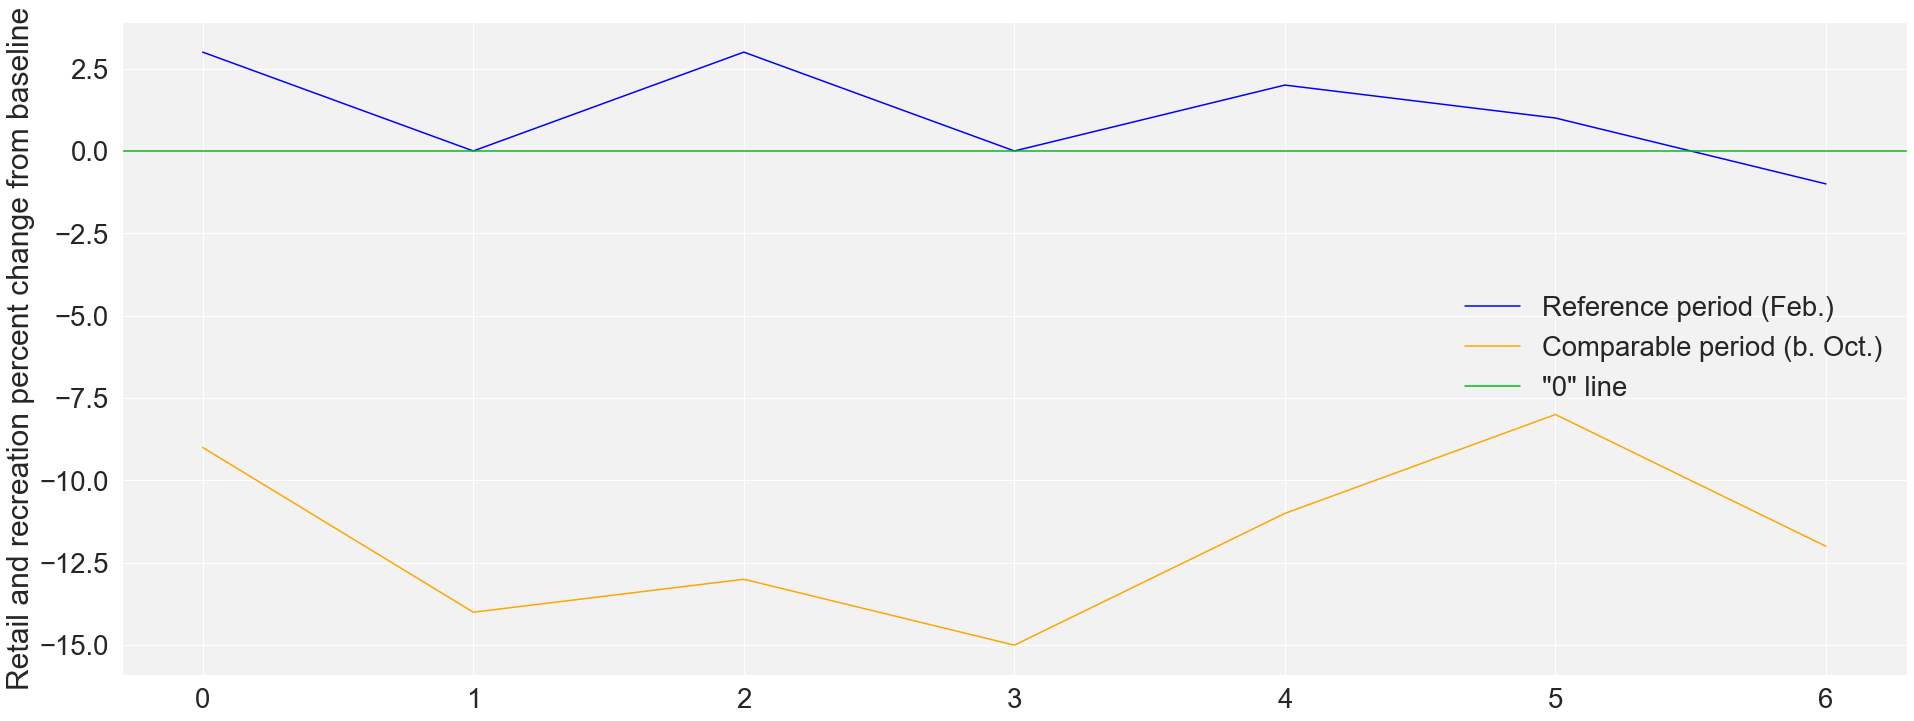

In [34]:
fig, ax = plt.subplots(figsize=(32,12))

sns.lineplot(ax = ax, x = [0,1,2,3,4,5,6], y = italia_s['retail_and_recreation_percent_change_from_baseline'][italia_s.index.isin(reference_list)], color = "blue")
sns.lineplot(ax = ax, x = [0,1,2,3,4,5,6], y = italia_s['retail_and_recreation_percent_change_from_baseline'][italia_s.index.isin(comparison_list)], color = "orange")

ax.set(ylabel ='Retail and recreation percent change from baseline')

plt.axhline(0, -15, 3, color = '#04B71A')

plt.legend(labels = ['Reference period (Feb.)', 'Comparable period (b. Oct.)', '"0" line'])

ax.set_facecolor('#F2F2F2')

plt.savefig('Similar_pattern_week_retail.png');

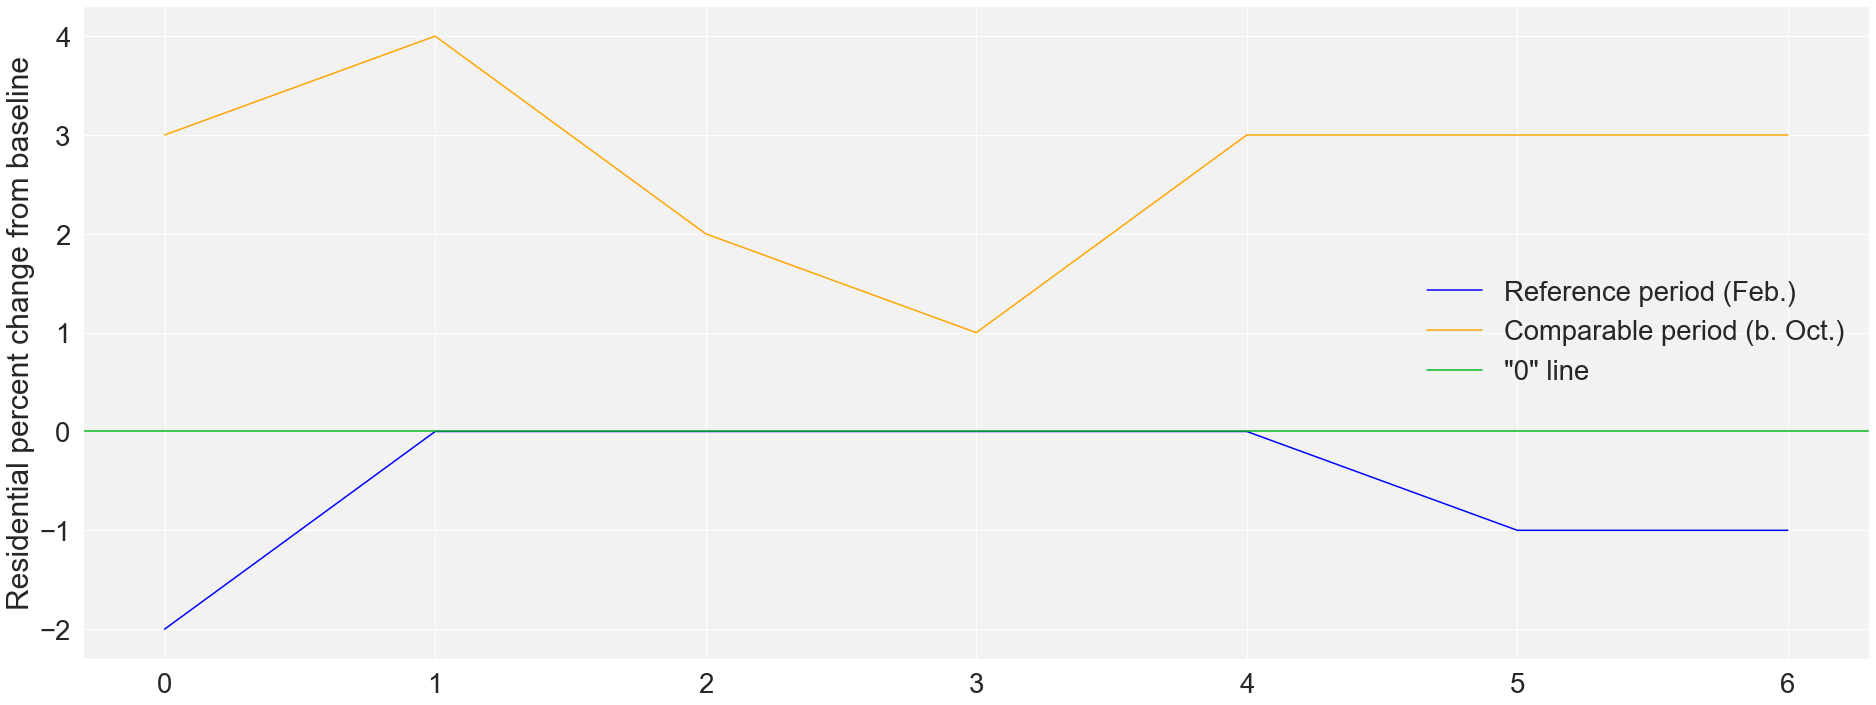

In [35]:
fig, ax = plt.subplots(figsize=(32,12))

sns.lineplot(ax = ax, x = [0,1,2,3,4,5,6], y = italia_s['residential_percent_change_from_baseline'][italia_s.index.isin(reference_list)], color = "blue" )
sns.lineplot(ax = ax, x = [0,1,2,3,4,5,6], y = italia_s['residential_percent_change_from_baseline'][italia_s.index.isin(comparison_list)], color = "orange")


ax.set(ylabel ='Residential percent change from baseline')

plt.axhline(0, -15, 3, color = '#04B71A')

plt.legend(labels = ['Reference period (Feb.)', 'Comparable period (b. Oct.)', '"0" line'])

ax.set_facecolor('#F2F2F2')

plt.savefig('Similar_pattern_week_home.png');

In [36]:
# Baseline-comparable week

bl_comparable = [255, 256, 257, 258, 259, 260, 260, 261]

italia_s[['date','parks_percent_change_from_baseline', 'retail_and_recreation_percent_change_from_baseline', 'residential_percent_change_from_baseline', 'weekday']][italia_s.index.isin(bl_comparable)]

,date,parks_percent_change_from_baseline,retail_and_recreation_percent_change_from_baseline,residential_percent_change_from_baseline,weekday
255,2020-10-27,1.0,-21.0,9.0,1
256,2020-10-28,7.0,-23.0,9.0,2
257,2020-10-29,-1.0,-24.0,10.0,3
258,2020-10-30,2.0,-26.0,10.0,4
259,2020-10-31,12.0,-29.0,7.0,5
260,2020-11-01,-3.0,-38.0,7.0,6
261,2020-11-02,-1.0,-24.0,10.0,0


In [37]:
avg_temp_r_f = []

for i in range(16,23):
    history = api.get_history(city = 'Rome', start_date= f'2020-02-{i}',end_date=f'2020-02-{i+1}')
    avg_temp_r_f.append(history.json['data'][0]['temp'])

In [38]:
avg_temp_r_o1 = []

for i in range(1,8):
    history = api.get_history(city = 'Rome', start_date= f'2020-10-{i}',end_date=f'2020-10-{i+1}')
    avg_temp_r_o1.append(history.json['data'][0]['temp'])

In [39]:
avg_temp_r_o2 = []

for i in range(27,31):
    history = api.get_history(city = 'Rome', start_date= f'2020-10-{i}',end_date=f'2020-10-{i+1}')
    avg_temp_r_o2.append(history.json['data'][0]['temp'])

history = api.get_history(city = 'Rome', start_date= f'2020-10-31',end_date=f'2020-11-1')
avg_temp_r_o2.append(history.json['data'][0]['temp'])

for i in range(1,3):
    history = api.get_history(city = 'Rome', start_date= f'2020-11-{i}',end_date=f'2020-11-{i+1}')
    avg_temp_r_o2.append(history.json['data'][0]['temp'])

In [40]:
avg_temp_n_f = []

for i in range(16,23):
    history = api.get_history(city = 'Naples', start_date= f'2020-02-{i}',end_date=f'2020-02-{i+1}')
    avg_temp_n_f.append(history.json['data'][0]['temp'])


In [41]:
avg_temp_n_o1 = []

for i in range(1,8):
    history = api.get_history(city = 'Naples', start_date= f'2020-10-{i}',end_date=f'2020-10-{i+1}')
    avg_temp_n_o1.append(history.json['data'][0]['temp'])

In [42]:
avg_temp_n_o2 = []

for i in range(27,31):
    history = api.get_history(city = 'Naples', start_date= f'2020-10-{i}',end_date=f'2020-10-{i+1}')
    avg_temp_n_o2.append(history.json['data'][0]['temp'])

history = api.get_history(city = 'Naples', start_date= f'2020-10-31',end_date=f'2020-11-1')
avg_temp_n_o2.append(history.json['data'][0]['temp'])

for i in range(1,3):
    history = api.get_history(city = 'Naples', start_date= f'2020-11-{i}',end_date=f'2020-11-{i+1}')
    avg_temp_n_o2.append(history.json['data'][0]['temp'])

In [43]:
avg_temp_m_f = []

for i in range(16,23):
    history = api.get_history(city = 'Milan', country = 'Italy', start_date= f'2020-02-{i}',end_date=f'2020-02-{i+1}')
    avg_temp_m_f.append(history.json['data'][0]['temp'])

In [44]:
avg_temp_m_o1 = []

for i in range(1,8):
    history = api.get_history(city = 'Milan', country = 'Italy', start_date= f'2020-10-{i}',end_date=f'2020-10-{i+1}')
    avg_temp_m_o1.append(history.json['data'][0]['temp'])

In [45]:
avg_temp_m_o2 = []

for i in range(27,31):
    history = api.get_history(city = 'Milan', country ='Italy', start_date= f'2020-10-{i}',end_date=f'2020-10-{i+1}')
    avg_temp_m_o2.append(history.json['data'][0]['temp'])

history = api.get_history(city = 'Milan', country ='Italy', start_date= f'2020-10-31',end_date=f'2020-11-1')
avg_temp_m_o2.append(history.json['data'][0]['temp'])

for i in range(1,3):
    history = api.get_history(city = 'Milan', country ='Italy', start_date= f'2020-11-{i}',end_date=f'2020-11-{i+1}')
    avg_temp_m_o2.append(history.json['data'][0]['temp'])

In [46]:
avg_temp_f = italia_s[['date', 'weekday']][italia_s.index.isin(reference_list)].reset_index()
avg_temp_f['naples'] = pd.Series(avg_temp_n_f)
avg_temp_f['rome'] = pd.Series(avg_temp_r_f)
avg_temp_f['milan'] = pd.Series(avg_temp_n_f)
avg_temp_f.drop(columns = 'index', inplace = True)
avg_temp_f['avg'] = avg_temp_f[['naples', 'rome', 'milan']].mean(axis = 1)

In [47]:
avg_temp_o1 = italia_s[['date', 'weekday']][italia_s.index.isin(comparison_list)].reset_index()
avg_temp_o1['naples'] = pd.Series(avg_temp_n_o1)
avg_temp_o1['rome'] = pd.Series(avg_temp_r_o1)
avg_temp_o1['milan'] = pd.Series(avg_temp_n_o1)
avg_temp_o1.drop(columns = 'index', inplace = True)
avg_temp_o1['avg'] = avg_temp_o1[['naples', 'rome', 'milan']].mean(axis = 1)

In [48]:
avg_temp_o2 = italia_s[['date', 'weekday']][italia_s.index.isin(bl_comparable)].reset_index()
avg_temp_o2['naples'] = pd.Series(avg_temp_n_o2)
avg_temp_o2['rome'] = pd.Series(avg_temp_r_o2)
avg_temp_o2['milan'] = pd.Series(avg_temp_n_o2)
avg_temp_o2.drop(columns = 'index', inplace = True)
avg_temp_o2['avg'] = avg_temp_o2[['naples', 'rome', 'milan']].mean(axis = 1)

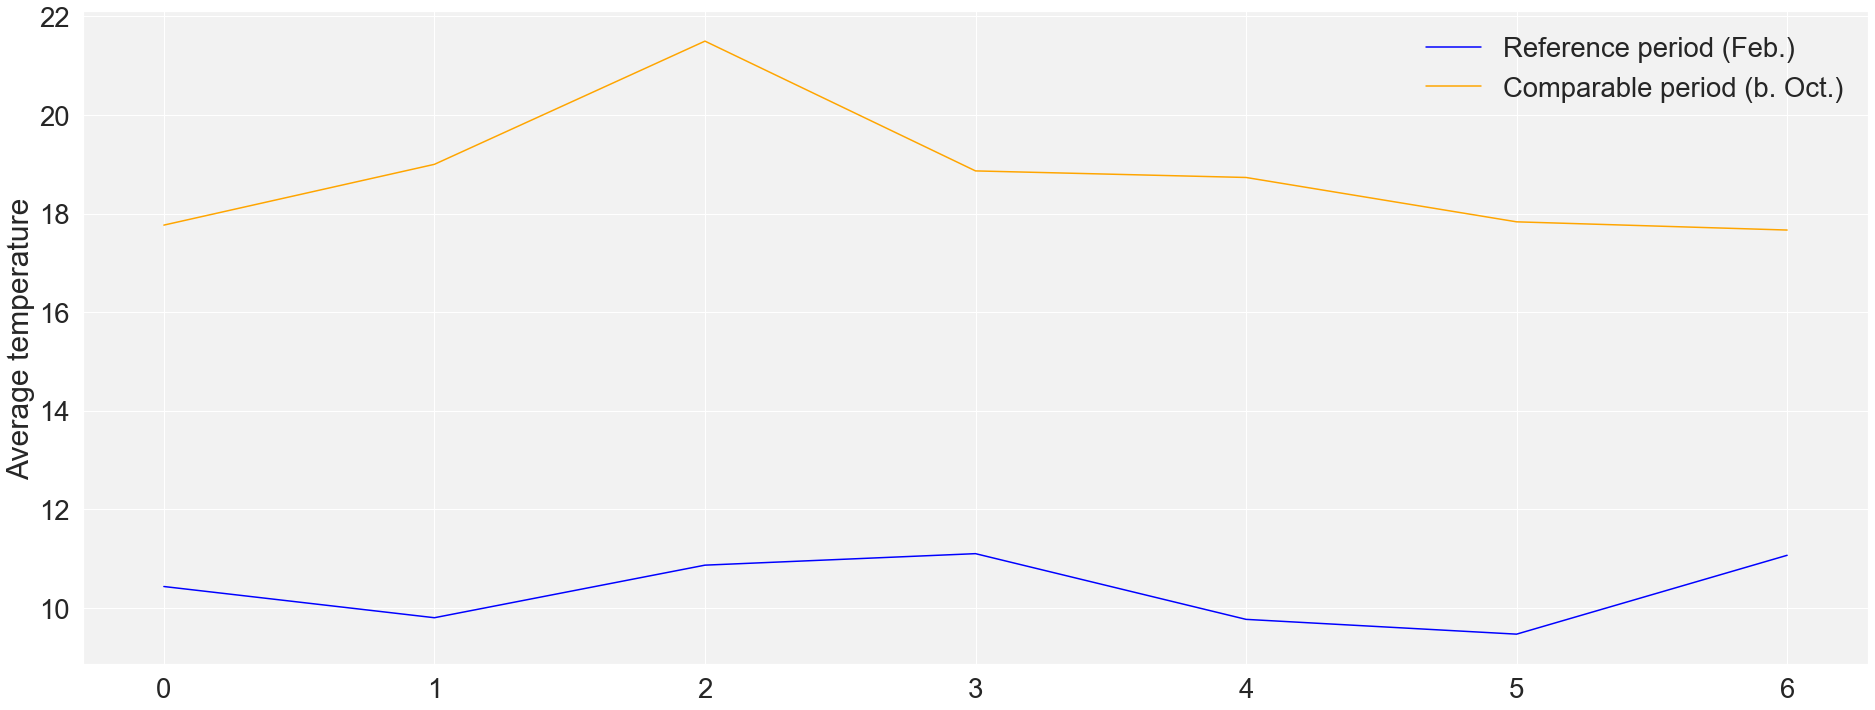

In [49]:
fig, ax = plt.subplots(figsize=(32,12))

sns.lineplot(ax = ax, x = [0,1,2,3,4,5,6], y = avg_temp_f['avg'], color = "blue")
sns.lineplot(ax = ax, x = [0,1,2,3,4,5,6], y = avg_temp_o1['avg'], color = "orange")

ax.set(ylabel ='Average temperature')

plt.legend(labels = ['Reference period (Feb.)', 'Comparable period (b. Oct.)', '"0" line'])

ax.set_facecolor('#F2F2F2')


plt.savefig('Similar_pattern_week_temp.png');

In [50]:
avg_temp_baseline_m = []
dates_baseline = []

for i in range(3,31):
    history = api.get_history(city = 'Milan', country ='Italy', start_date= f'2020-01-{i}',end_date=f'2020-01-{i+1}')
    avg_temp_baseline_m.append(history.json['data'][0]['temp'])
    dates_baseline.append(f'2020-01-{i}')

history = api.get_history(city = 'Milan', country ='Italy', start_date= f'2020-01-31',end_date=f'2020-02-01')
avg_temp_baseline_m.append(history.json['data'][0]['temp'])
dates_baseline.append('2020-01-31')

for i in range(1,7):
    history = api.get_history(city = 'Milan', country ='Italy', start_date= f'2020-02-{i}',end_date=f'2020-02-{i+1}')
    avg_temp_baseline_m.append(history.json['data'][0]['temp'])
    dates_baseline.append(f'2020-02-{i}')

HTTPError: 429 Client Error:  for url: https://api.weatherbit.io/v2.0/history/daily?key=e2b62675291d4c93aabcd1ed9ae3923b&city=Milan&start_date=2020-01-8&end_date=2020-01-9&country=Italy

In [ ]:
avg_temp_baseline_n = []

for i in range(3,31):
    history = api.get_history(city = 'Naples', country ='Italy', start_date= f'2020-01-{i}',end_date=f'2020-01-{i+1}')
    avg_temp_baseline_n.append(history.json['data'][0]['temp'])

history = api.get_history(city = 'Naples', country ='Italy', start_date= f'2020-01-31',end_date=f'2020-02-01')
avg_temp_baseline_n.append(history.json['data'][0]['temp'])

for i in range(1,7):
    history = api.get_history(city = 'Naples', country ='Italy', start_date= f'2020-02-{i}',end_date=f'2020-02-{i+1}')
    avg_temp_baseline_n.append(history.json['data'][0]['temp'])


In [ ]:
avg_temp_baseline_r = []

for i in range(3,31):
    history = api.get_history(city = 'Rome', country ='Italy', start_date= f'2020-01-{i}',end_date=f'2020-01-{i+1}')
    avg_temp_baseline_r.append(history.json['data'][0]['temp'])

history = api.get_history(city = 'Rome', country ='Italy', start_date= f'2020-01-31',end_date=f'2020-02-01')
avg_temp_baseline_r.append(history.json['data'][0]['temp'])

for i in range(1,7):
    history = api.get_history(city = 'Rome', country ='Italy', start_date= f'2020-02-{i}',end_date=f'2020-02-{i+1}')
    avg_temp_baseline_r.append(history.json['data'][0]['temp'])

In [ ]:
reference_temp = pd.DataFrame(dates_baseline, columns = ['date'])

In [ ]:
reference_temp['naples'] = pd.Series(avg_temp_baseline_n)
reference_temp['rome'] = pd.Series(avg_temp_baseline_r)
reference_temp['milan'] = pd.Series(avg_temp_baseline_m)
reference_temp['avg'] = reference_temp[['naples', 'rome', 'milan']].mean(axis = 1)
reference_temp['weekday'] = pd.to_datetime(reference_temp['date']).dt.weekday

In [ ]:
rt_list = reference_temp[['avg', 'weekday']].groupby(by ='weekday').median().values.tolist()
rt_list = [i[0] for i in rt_list]
rt = pd.DataFrame(rt_list, columns = ['median_temp'])
rt['weekday'] = rt.index

In [ ]:
fig, ax = plt.subplots(figsize=(32,12))
ax.set_xticklabels(labels = ['','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

sns.lineplot(ax = ax, x = rt['weekday'], y = rt['median_temp'], color = "blue")
sns.lineplot(ax = ax, x = avg_temp_o2['weekday'], y = avg_temp_o2['avg'], color = "orange")

ax.set(ylabel ='Average temperature', xlabel = 'Weekday')

plt.legend(labels = ['Reference period (Feb.)', 'Comparable period (e. Oct.)'])

ax.set_facecolor('#F2F2F2')

plt.savefig('Similar_week_temp.png');

In [ ]:
fig, ax = plt.subplots(figsize=(32,12))

sns.barplot(ax = ax, x = italia_s['date'][italia_s.index.isin(bl_comparable)], y = italia_s['parks_percent_change_from_baseline'][italia_s.index.isin(bl_comparable)], color = "orange")
ax.set_xticklabels(labels = ['2020-10-27','2020-10-28', '2020-10-29', '2020-10-30', '2020-10-31', '2020-11-01', '2020-11-02'],
                   rotation = 45)

plt.axhline(italia_s['parks_percent_change_from_baseline'][italia_s.index.isin(bl_comparable)].mean(), -3, 12, color = 'blue', label = 'Percent change mean')

plt.axhline(0, -3, 12, color = 'orange')

ax.set(ylabel ='Parks percent change from baseline', xlabel = 'Weekday')

leg = ax.legend()

ax.set_facecolor('#F2F2F2')

plt.savefig('Similar_week_pattern.png');

In [ ]:
fig, ax = plt.subplots(figsize=(32,12))

sns.barplot(ax = ax, x = italia_s['date'][italia_s.index.isin(bl_comparable)], y = italia_s['retail_and_recreation_percent_change_from_baseline'][italia_s.index.isin(bl_comparable)], color = "red")
ax.set_xticklabels(labels = ['2020-10-27','2020-10-28', '2020-10-29', '2020-10-30', '2020-10-31', '2020-11-01', '2020-11-02'],
                   rotation = 45)

plt.axhline(italia_s['retail_and_recreation_percent_change_from_baseline'][italia_s.index.isin(bl_comparable)].mean(), -3, 12, color = 'blue', label = 'Percent change mean')

plt.axhline(0, -3, 12, color = 'red')

ax.set(ylabel ='Retail and recreation percent change from baseline', xlabel = 'Date')

leg = ax.legend()

ax.set_facecolor('#F2F2F2')

plt.savefig('Similar_week_retail.png');

In [ ]:
fig, ax = plt.subplots(figsize=(32,12))

sns.barplot(ax = ax, x = italia_s['date'][italia_s.index.isin(bl_comparable)], y = italia_s['residential_percent_change_from_baseline'][italia_s.index.isin(bl_comparable)], color = "green")
ax.set_xticklabels(labels = ['2020-10-27','2020-10-28', '2020-10-29', '2020-10-30', '2020-10-31', '2020-11-01', '2020-11-02'],
                   rotation = 45)

plt.axhline(italia_s['residential_percent_change_from_baseline'][italia_s.index.isin(bl_comparable)].mean(), -3, 12, color = 'red', label = 'Percent change mean')

ax.set(ylabel ='Residential percent change from baseline', xlabel = 'Date')

leg = ax.legend()

ax.set_facecolor('#F2F2F2')

plt.savefig('Similar_week_home.png');